

#### Evaluate the accuracy of training set sizes for MNIST. Result should show using the base neural network architecture a performance curve (set of evaluated models each trained on a subset of the training data).  






In [1]:
## setting up libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
import tensorflow as tf

from keras.models import model_from_json
from keras.models import load_model

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D

from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten


from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU


In [2]:
#setting up GPU devices

physical_devices = tf.config.list_physical_devices('GPU')
try:
# Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
# Invalid device or cannot modify virtual devices once initialized.
    pass

In [3]:
## Prepare the data

# Model / data parameters
num_classes = 10

input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Split dataset into 10%....90% training sets 

x_train_10 = x_train[:6000]
x_train_20 = x_train[:12000]
x_train_30 = x_train[:18000]
x_train_40 = x_train[:24000]
x_train_50 = x_train[:30000]
x_train_60 = x_train[:36000]
x_train_70 = x_train[:42000]
x_train_80 = x_train[:48000]
x_train_90 = x_train[:54000]

y_train_10 = y_train[:6000]
y_train_20 = y_train[:12000]
y_train_30 = y_train[:18000]
y_train_40 = y_train[:24000]
y_train_50 = y_train[:30000]
y_train_60 = y_train[:36000]
y_train_70 = y_train[:42000]
y_train_80 = y_train[:48000]
y_train_90 = y_train[:54000]

# Put dataset into astype("float32") form 
x_train_10 = x_train_10.astype("float32") / 255
x_train_20 = x_train_20.astype("float32") / 255
x_train_30 = x_train_30.astype("float32") / 255
x_train_40 = x_train_40.astype("float32") / 255
x_train_50 = x_train_50.astype("float32") / 255
x_train_60 = x_train_60.astype("float32") / 255
x_train_70 = x_train_70.astype("float32") / 255
x_train_80 = x_train_80.astype("float32") / 255
x_train_90 = x_train_90.astype("float32") / 255

x_train_10 = np.expand_dims(x_train_10, -1)
x_train_20 = np.expand_dims(x_train_20, -1)
x_train_30 = np.expand_dims(x_train_30, -1)
x_train_40 = np.expand_dims(x_train_40, -1)
x_train_50 = np.expand_dims(x_train_50, -1)
x_train_60 = np.expand_dims(x_train_60, -1)
x_train_70 = np.expand_dims(x_train_70, -1)
x_train_80 = np.expand_dims(x_train_80, -1)
x_train_90 = np.expand_dims(x_train_90, -1)

# convert class vectors to binary class matrices
y_train_10 = keras.utils.to_categorical(y_train_10, num_classes)
y_train_20 = keras.utils.to_categorical(y_train_20, num_classes)
y_train_30 = keras.utils.to_categorical(y_train_30, num_classes)
y_train_40 = keras.utils.to_categorical(y_train_40, num_classes)
y_train_50 = keras.utils.to_categorical(y_train_50, num_classes)
y_train_60 = keras.utils.to_categorical(y_train_60, num_classes)
y_train_70 = keras.utils.to_categorical(y_train_70, num_classes)
y_train_80 = keras.utils.to_categorical(y_train_80, num_classes)
y_train_90 = keras.utils.to_categorical(y_train_90, num_classes)


In [4]:
## Prepare the data

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_test.shape)
print(x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples
(10000, 10)
(10000, 28, 28, 1)


In [5]:
#Define Model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation="softmax"),
    ]
)
#model.summary()


# Another way to define the same model, is to "add" layers one at a time

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

# Run different models for different outputs of dataset 
model_1 = define_model()
model_2 = define_model()
model_3 = define_model()
model_3 = define_model()
model_4 = define_model()
model_5 = define_model()
model_6 = define_model()
model_7 = define_model()
model_8 = define_model()
model_9 = define_model()

model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()
model_5.summary()
model_6.summary()
model_7.summary()
model_8.summary()
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [6]:
# Train all data

epochs = 10
batch_size= 128
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [7]:
history1=model_1.fit(x_train_10, y_train_10, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
43/43 [==============================] - 0s 11ms/step - loss: 1.0180 - accuracy: 0.7330 - val_loss: 0.3239 - val_accuracy: 0.9017
Epoch 2/10
43/43 [==============================] - 0s 9ms/step - loss: 0.2610 - accuracy: 0.9281 - val_loss: 0.1951 - val_accuracy: 0.9400
Epoch 3/10
43/43 [==============================] - 0s 9ms/step - loss: 0.1689 - accuracy: 0.9522 - val_loss: 0.1479 - val_accuracy: 0.9583
Epoch 4/10
43/43 [==============================] - 0s 9ms/step - loss: 0.1210 - accuracy: 0.9652 - val_loss: 0.1314 - val_accuracy: 0.9683
Epoch 5/10
43/43 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.9719 - val_loss: 0.1081 - val_accuracy: 0.9633
Epoch 6/10
43/43 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 0.9813 - val_loss: 0.1110 - val_accuracy: 0.9600
Epoch 7/10
43/43 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0865 - val_accuracy: 0.9750
Epoch 8/10
43/43 [=

In [8]:
history2=model_2.fit(x_train_20, y_train_20, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
85/85 [==============================] - 1s 10ms/step - loss: 0.6397 - accuracy: 0.8222 - val_loss: 0.2336 - val_accuracy: 0.9333
Epoch 2/10
85/85 [==============================] - 1s 9ms/step - loss: 0.1592 - accuracy: 0.9544 - val_loss: 0.1510 - val_accuracy: 0.9550
Epoch 3/10
85/85 [==============================] - 1s 9ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.1375 - val_accuracy: 0.9575
Epoch 4/10
85/85 [==============================] - 1s 9ms/step - loss: 0.0780 - accuracy: 0.9759 - val_loss: 0.1042 - val_accuracy: 0.9683
Epoch 5/10
85/85 [==============================] - 1s 9ms/step - loss: 0.0573 - accuracy: 0.9838 - val_loss: 0.0864 - val_accuracy: 0.9717
Epoch 6/10
85/85 [==============================] - 1s 9ms/step - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0758 - val_accuracy: 0.9742
Epoch 7/10
85/85 [==============================] - 1s 9ms/step - loss: 0.0375 - accuracy: 0.9885 - val_loss: 0.0987 - val_accuracy: 0.9717
Epoch 8/10
85/85 [=

In [9]:
history3=model_3.fit(x_train_30, y_train_30, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
127/127 [==============================] - 1s 10ms/step - loss: 0.4972 - accuracy: 0.8625 - val_loss: 0.1655 - val_accuracy: 0.9506
Epoch 2/10
127/127 [==============================] - 1s 9ms/step - loss: 0.1155 - accuracy: 0.9658 - val_loss: 0.1030 - val_accuracy: 0.9678
Epoch 3/10
127/127 [==============================] - 1s 9ms/step - loss: 0.0772 - accuracy: 0.9765 - val_loss: 0.0750 - val_accuracy: 0.9778
Epoch 4/10
127/127 [==============================] - 1s 9ms/step - loss: 0.0555 - accuracy: 0.9834 - val_loss: 0.0596 - val_accuracy: 0.9789
Epoch 5/10
127/127 [==============================] - 1s 9ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0552 - val_accuracy: 0.9833
Epoch 6/10
127/127 [==============================] - 1s 9ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0631 - val_accuracy: 0.9811
Epoch 7/10
127/127 [==============================] - 1s 9ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0536 - val_accuracy: 0.9828
Epoch

In [10]:
history4=model_4.fit(x_train_40, y_train_40, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
169/169 [==============================] - 2s 9ms/step - loss: 0.3746 - accuracy: 0.8863 - val_loss: 0.1190 - val_accuracy: 0.9617
Epoch 2/10
169/169 [==============================] - 1s 9ms/step - loss: 0.1019 - accuracy: 0.9698 - val_loss: 0.1119 - val_accuracy: 0.9638
Epoch 3/10
169/169 [==============================] - 1s 9ms/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.0591 - val_accuracy: 0.9804
Epoch 4/10
169/169 [==============================] - 1s 9ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0596 - val_accuracy: 0.9833
Epoch 5/10
169/169 [==============================] - 1s 9ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0413 - val_accuracy: 0.9846
Epoch 6/10
169/169 [==============================] - 1s 9ms/step - loss: 0.0298 - accuracy: 0.9910 - val_loss: 0.0477 - val_accuracy: 0.9833
Epoch 7/10
169/169 [==============================] - 1s 9ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 

In [11]:
history5=model_5.fit(x_train_50, y_train_50, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 2s 9ms/step - loss: 0.3297 - accuracy: 0.9027 - val_loss: 0.1176 - val_accuracy: 0.9627
Epoch 2/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0816 - accuracy: 0.9756 - val_loss: 0.0726 - val_accuracy: 0.9750
Epoch 3/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0571 - accuracy: 0.9830 - val_loss: 0.0540 - val_accuracy: 0.9830
Epoch 4/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0623 - val_accuracy: 0.9803
Epoch 5/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0485 - val_accuracy: 0.9837
Epoch 6/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0454 - val_accuracy: 0.9837
Epoch 7/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0467 - val_accuracy: 0.9860
Epoch 

In [12]:
history6=model_6.fit(x_train_60, y_train_60, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
254/254 [==============================] - 2s 9ms/step - loss: 0.3046 - accuracy: 0.9114 - val_loss: 0.0965 - val_accuracy: 0.9708
Epoch 2/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0872 - val_accuracy: 0.9722
Epoch 3/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 4/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0544 - val_accuracy: 0.9806
Epoch 5/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0589 - val_accuracy: 0.9814
Epoch 6/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0554 - val_accuracy: 0.9836
Epoch 7/10
254/254 [==============================] - 2s 9ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0492 - val_accuracy: 0.9844
Epoch 

In [13]:
history7=model_7.fit(x_train_70, y_train_70, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
296/296 [==============================] - 3s 9ms/step - loss: 0.2740 - accuracy: 0.9211 - val_loss: 0.0898 - val_accuracy: 0.9710
Epoch 2/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0716 - accuracy: 0.9777 - val_loss: 0.0678 - val_accuracy: 0.9771
Epoch 3/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 4/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0463 - val_accuracy: 0.9855
Epoch 5/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0525 - val_accuracy: 0.9824
Epoch 6/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0488 - val_accuracy: 0.9860
Epoch 7/10
296/296 [==============================] - 3s 9ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 

In [14]:
history8=model_8.fit(x_train_80, y_train_80, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
338/338 [==============================] - 3s 9ms/step - loss: 0.2700 - accuracy: 0.9223 - val_loss: 0.1089 - val_accuracy: 0.9667
Epoch 2/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 0.0676 - val_accuracy: 0.9773
Epoch 3/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0492 - val_accuracy: 0.9840
Epoch 4/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 5/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0492 - val_accuracy: 0.9860
Epoch 6/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0475 - val_accuracy: 0.9858
Epoch 7/10
338/338 [==============================] - 3s 9ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 

In [15]:
history9=model_9.fit(x_train_90, y_train_90, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
380/380 [==============================] - 4s 9ms/step - loss: 0.2333 - accuracy: 0.9299 - val_loss: 0.0843 - val_accuracy: 0.9744
Epoch 2/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0619 - val_accuracy: 0.9798
Epoch 3/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 4/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 5/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 6/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 7/10
380/380 [==============================] - 3s 9ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0477 - val_accuracy: 0.9872
Epoch 

In [16]:
## Evaluate the trained model
score1 = model_1.evaluate(x_test, y_test, verbose=0)
score2 = model_2.evaluate(x_test, y_test, verbose=0)
score3 = model_3.evaluate(x_test, y_test, verbose=0)
score4 = model_4.evaluate(x_test, y_test, verbose=0)
score5 = model_5.evaluate(x_test, y_test, verbose=0)
score6 = model_6.evaluate(x_test, y_test, verbose=0)
score7 = model_7.evaluate(x_test, y_test, verbose=0)
score8 = model_8.evaluate(x_test, y_test, verbose=0)
score9 = model_9.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score1[0])
print("Test accuracy:", score1[1])
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])
print("Test loss:", score4[0])
print("Test accuracy:", score4[1])
print("Test loss:", score5[0])
print("Test accuracy:", score5[1])
print("Test loss:", score6[0])
print("Test accuracy:", score6[1])
print("Test loss:", score7[0])
print("Test accuracy:", score7[1])
print("Test loss:", score8[0])
print("Test accuracy:", score8[1])
print("Test loss:", score9[0])
print("Test accuracy:", score9[1])


Test loss: 0.08745235204696655
Test accuracy: 0.9732999801635742
Test loss: 0.07192684710025787
Test accuracy: 0.9797000288963318
Test loss: 0.04629429429769516
Test accuracy: 0.9850999712944031
Test loss: 0.04697094485163689
Test accuracy: 0.9853000044822693
Test loss: 0.0366741418838501
Test accuracy: 0.9884999990463257
Test loss: 0.035164665430784225
Test accuracy: 0.9891999959945679
Test loss: 0.039190806448459625
Test accuracy: 0.9886000156402588
Test loss: 0.03932192549109459
Test accuracy: 0.988099992275238
Test loss: 0.02889876626431942
Test accuracy: 0.9904999732971191


In [17]:
# Zip all data into workable dictionaries

dict(zip(model_1.metrics_names, score1))
dict(zip(model_2.metrics_names, score2))
dict(zip(model_3.metrics_names, score3))
dict(zip(model_4.metrics_names, score4))
dict(zip(model_5.metrics_names, score5))
dict(zip(model_6.metrics_names, score6))
dict(zip(model_7.metrics_names, score7))
dict(zip(model_8.metrics_names, score8))
dict(zip(model_9.metrics_names, score9))

{'loss': 0.02889876626431942, 'accuracy': 0.9904999732971191}

In [18]:
# Create two different plotting functions to better see the data sets 

def summarize_diagnostics1(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.xlabel('Training Epochs')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.tight_layout(pad=2)
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.xlabel('Training Epochs')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.ylim(0.75, 1)
    pyplot.show()
def summarize_diagnostics2(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.xlabel('Training Epochs')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.tight_layout(pad=2)
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.xlabel('Training Epochs')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.ylim(0.90, 1)
    pyplot.show()

10% Of training Data


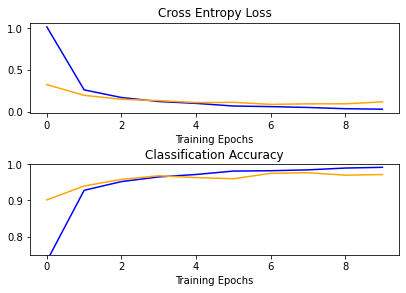

20% Of training Data


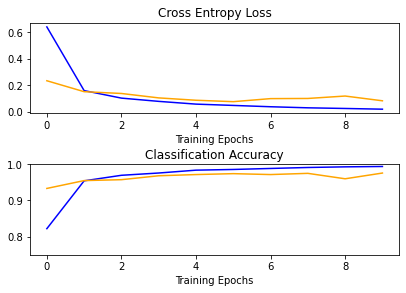

30% Of training Data


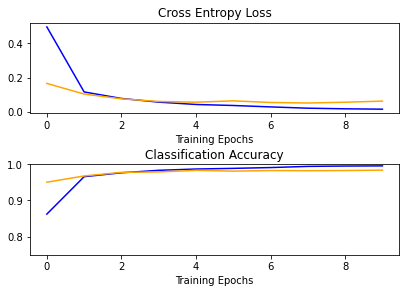

40% Of training Data


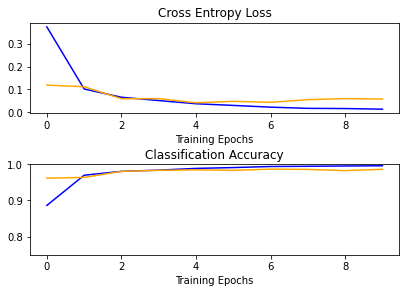

50% Of training Data


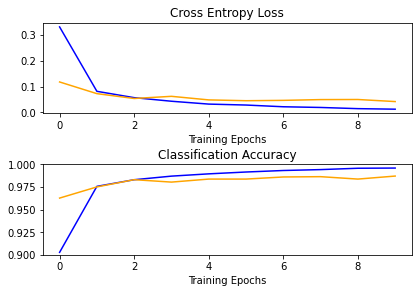

60% Of training Data


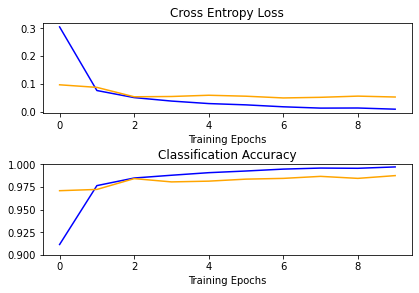

70% Of training Data


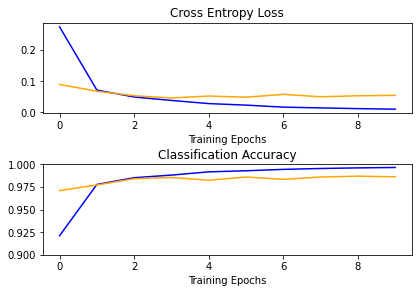

80% Of training Data


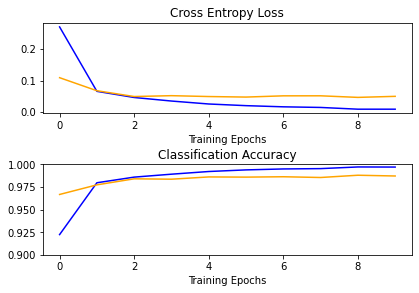

90% Of training Data


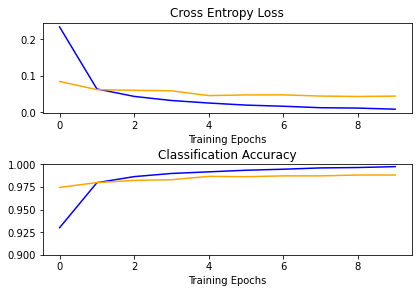

In [19]:
#Output results 

print("10% Of training Data")
summarize_diagnostics1([history1])
print("20% Of training Data")
summarize_diagnostics1([history2])
print("30% Of training Data")
summarize_diagnostics1([history3])
print("40% Of training Data")
summarize_diagnostics1([history4])
print("50% Of training Data")
summarize_diagnostics2([history5])
print("60% Of training Data")
summarize_diagnostics2([history6])
print("70% Of training Data")
summarize_diagnostics2([history7])
print("80% Of training Data")
summarize_diagnostics2([history8])
print("90% Of training Data")
summarize_diagnostics2([history9])


In [20]:
# Run box plot for further Analysis of Part 1

from numpy import mean
from numpy import std
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()
    
    

Accuracy: mean=53.038 std=44.292, n=2


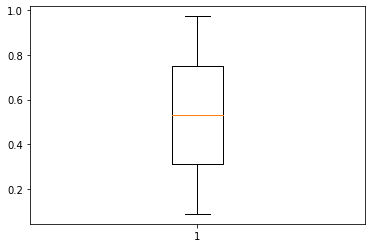

Accuracy: mean=52.581 std=45.389, n=2


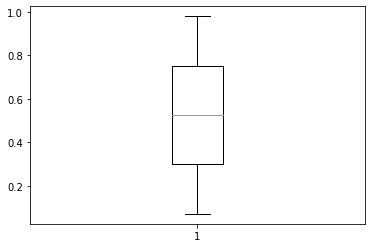

Accuracy: mean=51.570 std=46.940, n=2


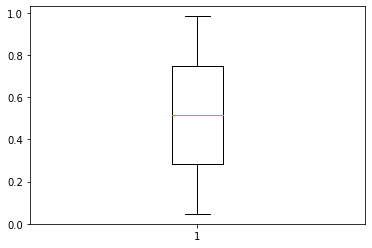

Accuracy: mean=51.614 std=46.916, n=2


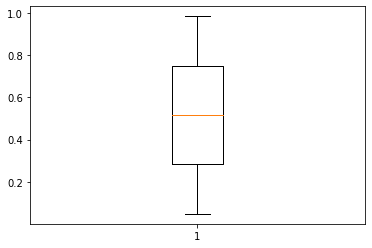

Accuracy: mean=51.259 std=47.591, n=2


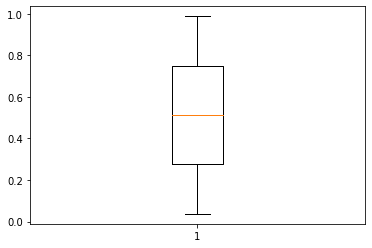

Accuracy: mean=51.218 std=47.702, n=2


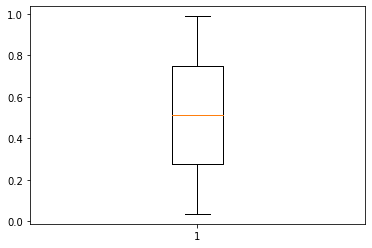

Accuracy: mean=51.390 std=47.470, n=2


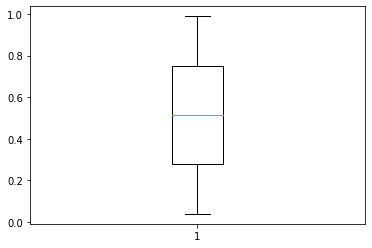

Accuracy: mean=51.371 std=47.439, n=2


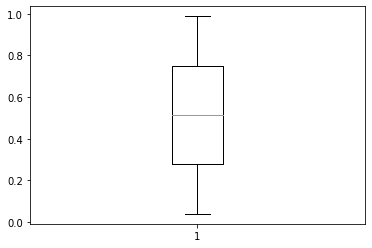

Accuracy: mean=50.970 std=48.080, n=2


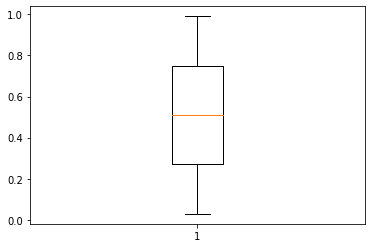

In [21]:
summarize_performance(score1)
summarize_performance(score2)
summarize_performance(score3)
summarize_performance(score4)
summarize_performance(score5)
summarize_performance(score6)
summarize_performance(score7)
summarize_performance(score8)
summarize_performance(score9)

Analysis of Part 1: 
We can see in the analysis of the graphing portion of different training sets that the lower the training set will require more Epoch to come up to greater accuracy over time. What we can also take away from this graphing function is that the cross-entropy loss stays relatively the same throughout the training sets. This is a good measure of the data sets as it shows that we're not overfitting the training sets. We can also see that in higher numbers of training sets that the accuracy will come faster against the testing set with more trainable data. 



#### Using the MNIST dataset, Construct and evaluate a summary view of a different neural network

#### Evaluate changes to the size of convolutional kernels, pooling, dense fully connected, and report on the influence to the “summary” performance of the test sets.

#### Define code for a different CNN architecture base architecture and using the same training process, evaluate the effectiveness of various parameters.  Example- do your results show the smallest level of dense network needed to achieve within 1-5% of the best case.


In [22]:
# Set test model for test 
modeltest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation="softmax"),
    ]
)

# Loop over 5 models increasing Dense & there for Conv2D & MaxPooling2D along the way 

def define_modelA():

    modelA = Sequential()
    modelA.add(Conv2D(8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    modelA.add(MaxPooling2D())
    modelA.add(Conv2D(16,kernel_size=5,activation='relu'))
    modelA.add(MaxPooling2D())
    modelA.add(Flatten())
    modelA.add(Dense(128, activation='relu'))
    modelA.add(Dense(10, activation='softmax'))
    modelA.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return modelA

def define_modelB():

    modeltest = Sequential()
    modeltest.add(Conv2D(16,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    modeltest.add(MaxPooling2D())
    modeltest.add(Conv2D(32,kernel_size=5,activation='relu'))
    modeltest.add(MaxPooling2D())
    modeltest.add(Flatten())
    modeltest.add(Dense(128, activation='relu'))
    modeltest.add(Dense(10, activation='softmax'))
    modeltest.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return modeltest

def define_modelC():

    modeltest = Sequential()
    modeltest.add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    modeltest.add(MaxPooling2D())
    modeltest.add(Conv2D(48,kernel_size=5,activation='relu'))
    modeltest.add(MaxPooling2D())
    modeltest.add(Flatten())
    modeltest.add(Dense(128, activation='relu'))
    modeltest.add(Dense(10, activation='softmax'))
    modeltest.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return modeltest

def define_modelD():

    modeltest = Sequential()
    modeltest.add(Conv2D(40,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    modeltest.add(MaxPooling2D())
    modeltest.add(Conv2D(80,kernel_size=5,activation='relu'))
    modeltest.add(MaxPooling2D())
    modeltest.add(Flatten())
    modeltest.add(Dense(128, activation='relu'))
    modeltest.add(Dense(10, activation='softmax'))
    modeltest.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return modeltest

def define_modelE():

    modeltest = Sequential()
    modeltest.add(Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    modeltest.add(MaxPooling2D())
    modeltest.add(Conv2D(96,kernel_size=5,activation='relu'))
    modeltest.add(MaxPooling2D())
    modeltest.add(Flatten())
    modeltest.add(Dense(128, activation='relu'))
    modeltest.add(Dense(10, activation='softmax'))
    modeltest.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return modeltest

# Get models

modelA = define_modelA()
modelB = define_modelB()
modelC = define_modelC()
modelD = define_modelD()
modelE = define_modelE()

# Print out summary of models 

modelA.summary()
modelB.summary()
modelC.summary()
modelD.summary()
modelE.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

In [23]:
# Train all data

historyA=modelA.fit(x_train, y_train, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 13ms/step - loss: 0.3429 - accuracy: 0.8991 - val_loss: 0.0974 - val_accuracy: 0.9737
Epoch 2/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0964 - accuracy: 0.9704 - val_loss: 0.0633 - val_accuracy: 0.9817
Epoch 3/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.0520 - val_accuracy: 0.9847
Epoch 4/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 5/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 6/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0386 - accuracy: 0.9884 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 7/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0333 - accuracy: 0.9896 - val_loss: 0.0396 - val_accuracy: 0.9880

In [24]:
historyB=modelB.fit(x_train, y_train, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2607 - accuracy: 0.9254 - val_loss: 0.0719 - val_accuracy: 0.9802
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0479 - val_accuracy: 0.9870
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0447 - accuracy: 0.9867 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0360 - val_accuracy: 0.9905
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0380 - val_accuracy: 0.9890
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0351 - val_accuracy: 0.9903
Epoch 

In [25]:
historyC=modelC.fit(x_train, y_train, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 8ms/step - loss: 0.2192 - accuracy: 0.9350 - val_loss: 0.0664 - val_accuracy: 0.9810
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0454 - val_accuracy: 0.9872
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0532 - val_accuracy: 0.9843
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9915
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0345 - val_accuracy: 0.9903
Epoch 7/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0336 - val_accuracy: 0.9918
Epoch 

In [26]:
historyD=modelD.fit(x_train, y_train, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 5s 12ms/step - loss: 0.1955 - accuracy: 0.9420 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0332 - accuracy: 0.9893 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0354 - val_accuracy: 0.9905
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0324 - val_accuracy: 0.9910
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0302 - val_accuracy: 0.9922

In [27]:
historyE=modelE.fit(x_train, y_train, batch_size=batch_size, 
                     epochs=epochs,validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 5s 13ms/step - loss: 0.1817 - accuracy: 0.9450 - val_loss: 0.0584 - val_accuracy: 0.9827
Epoch 2/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 3/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 4/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0295 - val_accuracy: 0.9923
Epoch 5/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0273 - val_accuracy: 0.9935
Epoch 6/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 0.9927
Epoch 7/10
422/422 [==============================] - 5s 13ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0336 - val_accuracy: 0.9903

In [28]:
## Evaluate the trained model
scoreA = modelA.evaluate(x_test, y_test, verbose=0)
scoreB = modelB.evaluate(x_test, y_test, verbose=0)
scoreC = modelC.evaluate(x_test, y_test, verbose=0)
scoreD = modelD.evaluate(x_test, y_test, verbose=0)
scoreE = modelE.evaluate(x_test, y_test, verbose=0)

print("Test loss:", scoreA[0])
print("Test accuracy:", scoreA[1])
print("Test loss:", scoreB[0])
print("Test accuracy:", scoreB[1])
print("Test loss:", scoreC[0])
print("Test accuracy:", scoreC[1])
print("Test loss:", scoreD[0])
print("Test accuracy:", scoreD[1])
print("Test loss:", scoreE[0])
print("Test accuracy:", scoreE[1])


Test loss: 0.030736608430743217
Test accuracy: 0.9905999898910522
Test loss: 0.028934674337506294
Test accuracy: 0.9918000102043152
Test loss: 0.030278174206614494
Test accuracy: 0.9904000163078308
Test loss: 0.026444533839821815
Test accuracy: 0.9921000003814697
Test loss: 0.02652825601398945
Test accuracy: 0.9933000206947327


In [29]:
dict(zip(modelA.metrics_names, scoreA))
dict(zip(modelB.metrics_names, scoreB))
dict(zip(modelC.metrics_names, scoreC))
dict(zip(modelD.metrics_names, scoreD))
dict(zip(modelE.metrics_names, scoreE))


{'loss': 0.02652825601398945, 'accuracy': 0.9933000206947327}

modelA


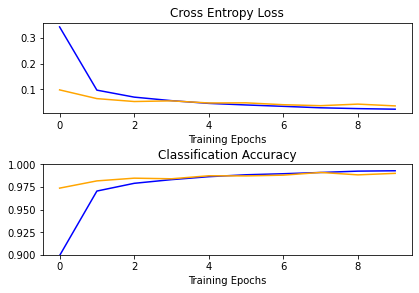

modelB


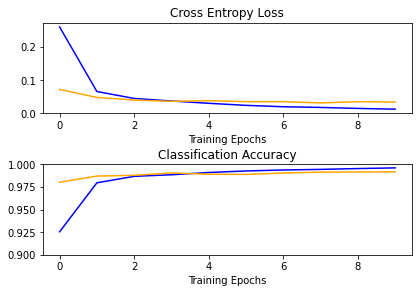

modelC


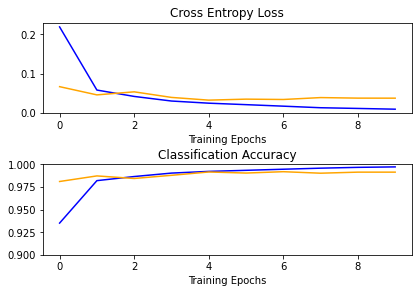

modelD


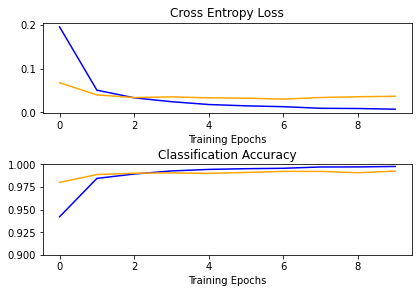

modelE


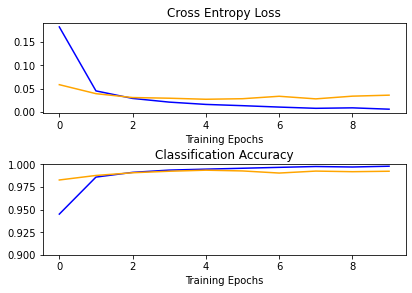

In [30]:
print("modelA")
summarize_diagnostics2([historyA])
print("modelB")
summarize_diagnostics2([historyB])
print("modelC")
summarize_diagnostics2([historyC])
print("modelD")
summarize_diagnostics2([historyD])
print("modelE")
summarize_diagnostics2([historyE])

Analysis: 

In looking into the architecture of different models constructed in smallVGG, we once again look into the graphs of output that they produce. Most notably, we need to look into the summary of each model output. With increasing the dense function, we also increase the Convolutional 2 dimensional layer along with the density of the model. In doing this, we increase the total parameters trained, the trainable parameters in order to gain a higher accuracy on output. In defining the models such as this we can see the effectiveness of various parameters within the neural network. In evaluating the base model versus the newly created models, we can even see that the higher density model in model E creates a greater accurate training model. I will be using this model to complete part number 3 in practice. 




#### In the evaluation of the neural networks, you should have finished complete model develop (training set generation and training process). 

#### Build the confusion matrix for the MNIST x_test input to show which categories are the best predicted and worst predicted.

#### Use sckit-learn tools to generate results of sensitivity/specificity and precision/recall.


In [31]:
# Using Model E

results = modelE.predict(x_test,verbose=0)
print (results)

[[1.6947561e-14 3.7070168e-13 3.3663200e-10 ... 1.0000000e+00
  1.8791461e-11 1.6860437e-11]
 [6.7908568e-11 2.5676508e-11 1.0000000e+00 ... 2.0208628e-17
  2.6998855e-16 5.0510973e-16]
 [3.7440719e-07 9.9997163e-01 9.2288097e-08 ... 2.5723504e-05
  9.9248575e-07 2.1428045e-08]
 ...
 [7.7749232e-22 7.7884015e-14 5.4038197e-17 ... 4.4364243e-12
  3.0477156e-13 9.7339522e-14]
 [3.7780639e-16 3.2831493e-18 8.4251648e-20 ... 1.2542073e-18
  1.3171144e-09 1.4726831e-13]
 [5.4838534e-13 3.7060039e-14 4.8171654e-11 ... 7.8266201e-20
  7.0531016e-13 5.1947861e-15]]


In [32]:
predict_results = modelE.predict_classes(x_test)
print (predict_results)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[7 2 1 ... 4 5 6]


In [33]:
# How do the predictions look compared to the actual ground truth of y_test
for index in range(20):
    print (predict_results[index], y_test[index])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
for index in range(20):
    print (predict_results[index], np.argmax(y_test[index], axis=-1))
    #cnf_matrix = confusion_matrix(y_test[index], predict_results[index])

#np.set_printoptions(precision=2)

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4


In [35]:
# Make predictions
predictions = modelE.predict(x_test)
print ('\nClass propbabilities for test image 0')
print (predictions[0])
print ('\nPrdicted class for test image 0:', np.argmax(predictions[0]))
print ('Actual classification for test image 0:', y_test[0])


Class propbabilities for test image 0
[1.6947561e-14 3.7070168e-13 3.3663200e-10 6.1201288e-10 8.2125990e-18
 1.1767160e-11 1.4056740e-19 1.0000000e+00 1.8791461e-11 1.6860437e-11]

Prdicted class for test image 0: 7
Actual classification for test image 0: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Confusion matrix, without normalization
[[ 974    1    0    0    0    1    1    1    2    0]
 [   0 1128    1    2    0    0    2    1    1    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   0    0    0    7    0  883    1    0    0    1]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    1    3    1    0    0    0 1021    1    1]
 [   0    0    1    1    0    1    0    0  968    3]
 [   0    0    0    2    5    5    0    4    0  993]]
Normalized confusion matrix
[[9.94e-01 1.02e-03 0.00e+00 0.00e+00 0.00e+00 1.02e-03 1.02e-03 1.02e-03
  2.04e-03 0.00e+00]
 [0.00e+00 9.94e-01 8.81e-04 1.76e-03 0.00e+00 0.00e+00 1.76e-03 8.81e-04
  8.81e-04 0.00e+00]
 [0.00e+00 0.00e+00 9.97e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.91e-03
  0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 9.90e-04 9.98e-01 0.00e+00 9.90e-04 0.00e+00 0.00e+00
  0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0

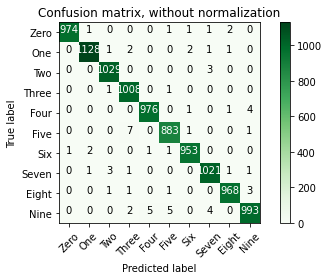

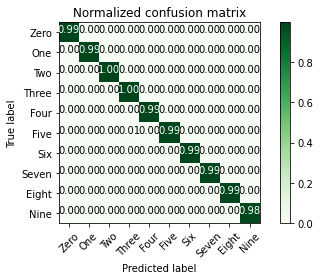

In [36]:
# SHOW CONFUSION MATRIX
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Set up data for output 

y_pred = np.argmax(predictions, axis=-1)
send = np.argmax(y_test, axis=-1)
cnf_matrix = confusion_matrix(send, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Show Confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


In [39]:
# generate results of sensitivity/specificity and precision/recall.

from sklearn.metrics import classification_report

cm_report = confusion_matrix(send, y_pred)
print('Confusion Matrix : \n', cm_report)
total=sum(sum(cm_report))

accuracy=(cm_report [0,0]+cm_report [1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm_report [0,0]/(cm_report [0,0]+cm_report [0,1])
print('Sensitivity : ', sensitivity)

specificity = cm_report[1,1]/(cm_report[1,0]+cm_report[1,1])
print('Specificity : ', specificity)

print("\n")
print("Classification Report")

print(classification_report(send, y_pred, target_names=class_names))



Confusion Matrix : 
 [[ 974    1    0    0    0    1    1    1    2    0]
 [   0 1128    1    2    0    0    2    1    1    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    1 1008    0    1    0    0    0    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   0    0    0    7    0  883    1    0    0    1]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    1    3    1    0    0    0 1021    1    1]
 [   0    0    1    1    0    1    0    0  968    3]
 [   0    0    0    2    5    5    0    4    0  993]]
Accuracy :  0.2102
Sensitivity :  0.9989743589743589
Specificity :  1.0


Classification Report
              precision    recall  f1-score   support

        Zero       1.00      0.99      1.00       980
         One       1.00      0.99      1.00      1135
         Two       0.99      1.00      1.00      1032
       Three       0.99      1.00      0.99      1010
        Four       0.99      0.99      0.99       982
        Five       0.99    

Analysis:

We can see that our model actually preformed great! When we look into the confusion matrix, we are really looking into how well the model failed against all the inputs and the gathered outputs. We can see that most if not all the data from the inputted guesses where almost dead on. Im extremely happy with this model E. There might be some false positives within the model but since we have such a high output of good guesses the learning objective was achieved. 


#### The rest of the program is just saving the model and looking into more aspects of the trained model. 

In [40]:
# Save the model
modelE.save('basemodel_MNIST.h5')

In [41]:
# Load the model
test_model = load_model('basemodel_MNIST.h5')

(28, 28, 1)


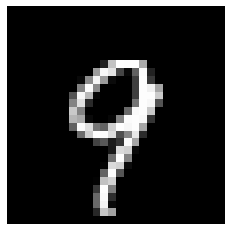

In [42]:
one_test = np.array(x_test[560])
print (one_test.shape)

plt.imshow(one_test,cmap=pyplot.get_cmap('gray'))
plt.axis('off')
plt.show()

In [43]:
# Need to expand the dimension in the front because the network was trained to take in an array of tensors
one_test = np.expand_dims(one_test, axis=0)

print (one_test.shape)
prediction = model.predict_classes(one_test)

print ('original model', prediction)

prediction = test_model.predict_classes(one_test)

print ('re-loaded model', prediction)

(1, 28, 28, 1)
original model [3]
re-loaded model [9]


In [44]:
# Let's practice on real data
(prac_x_train, prac_y_train), (prac_x_test, prac_y_test) = keras.datasets.mnist.load_data()
# Let's create an image file: this is from raw data not scaled 
cv2.imwrite('test_image_cv.jpg',prac_x_train[144] ) 
print (prac_y_train[144])


8


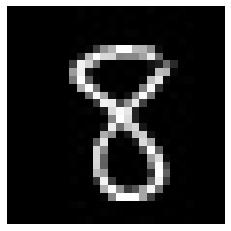

In [45]:
test_img = cv2.imread('test_image_cv.jpg', cv2.COLOR_BGR2GRAY) 

plt.imshow(test_img,cmap=pyplot.get_cmap('gray'))
plt.axis('off')
plt.show()

In [46]:
test_img = test_img.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
test_img = np.expand_dims(test_img, -1)

one_test = np.expand_dims(test_img, axis=0)

print (one_test.shape)
prediction = model.predict_classes(one_test)

print ('original model', prediction)

prediction = test_model.predict_classes(one_test)

print ('re-loaded model', prediction)

(1, 28, 28, 1)
original model [8]
re-loaded model [8]
